<a href="https://colab.research.google.com/github/gyuchangShim/MJU_AI/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A51_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library import
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
# load dataset from imdb(영화 리뷰 데이터)
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_inpjt, test_target) = imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [10]:
# print train data size
print(train_input.shape, train_target.shape)
print(len(train_input[0]))
print(len(train_input[1]))

# print train data value (index = 0)
print(train_input[0])

# check one-hot vector
print(train_target[:20])

(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [12]:
# data setting
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [14]:
# calculate each sentence's length from train_input data (mean & median)
import numpy as np
lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


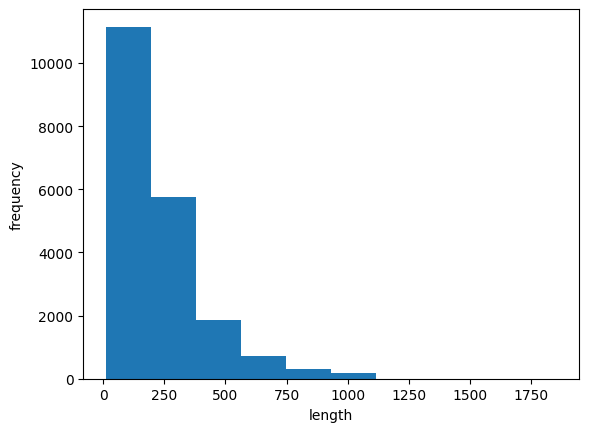

In [16]:
# create histogram (length - frequency)
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [27]:
# rnn model setting
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10:])
print(train_seq[5])

# validation setting
val_seq = pad_sequences(val_input, maxlen = 100)

(20000, 100)
[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [28]:
# create RNN model
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 300)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)

model.summary()

(20000, 100, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 8)                 2472      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# train model
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 74ms/step - loss: 0.7044 - accuracy: 0.4892 - val_loss: 0.7026 - val_accuracy: 0.4888
Epoch 2/100
  3/313 [..............................] - ETA: 18s - loss: 0.6962 - accuracy: 0.4792

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 22s 70ms/step - loss: 0.6975 - accuracy: 0.4932 - val_loss: 0.6989 - val_accuracy: 0.4910
Epoch 3/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6950 - accuracy: 0.5004 - val_loss: 0.6968 - val_accuracy: 0.4936
Epoch 4/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6933 - accuracy: 0.5081 - val_loss: 0.6952 - val_accuracy: 0.4986
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6919 - accuracy: 0.5159 - val_loss: 0.6941 - val_accuracy: 0.5040
Epoch 6/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6908 - accuracy: 0.5253 - val_loss: 0.6931 - val_accuracy: 0.5116
Epoch 7/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6896 - accuracy: 0.5349 - val_loss: 0.6923 - val_accuracy: 0.5160
Epoch 8/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6885 - accuracy: 0.5421 - val_loss: 0.6914 - val_accuracy: 0.52

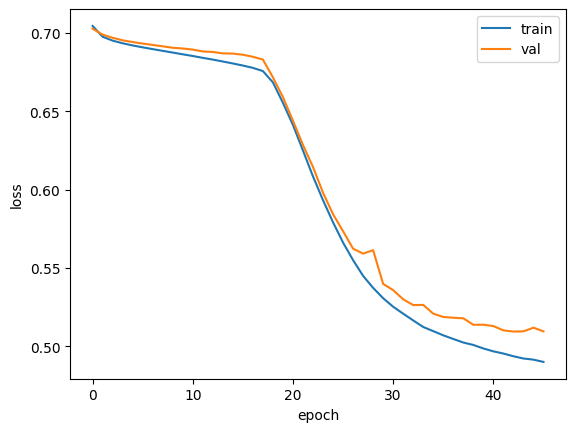

In [30]:
# check loss & visualization
# 그래프의 형태를 보고 epoch를 늘릴지 줄일지 결정
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()